## Procesamiento del histograma

Se $r_k$ para $k=0,1,2,\ldots,L-1$, las intensidades de un imagen de L-niveles. El histograma no normalizado esta dado por 
 

\begin{equation*}
h(r_k)=n_k \text{  para  } k=0,1,2,\ldots,L-1
\end{equation*}

donde $n_k$ es  el numero de pixeles en la imagen con intensidad $r_k$. De manera similar tenemos el histograma normalizado esta dado por 
\begin{equation*}
p(r_k)=\frac{h(r_k)}{MN}= \frac{n_k}{MN}
\end{equation*}
donde $M$ y $N$ son el número de renglones y columnas de la imagen 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

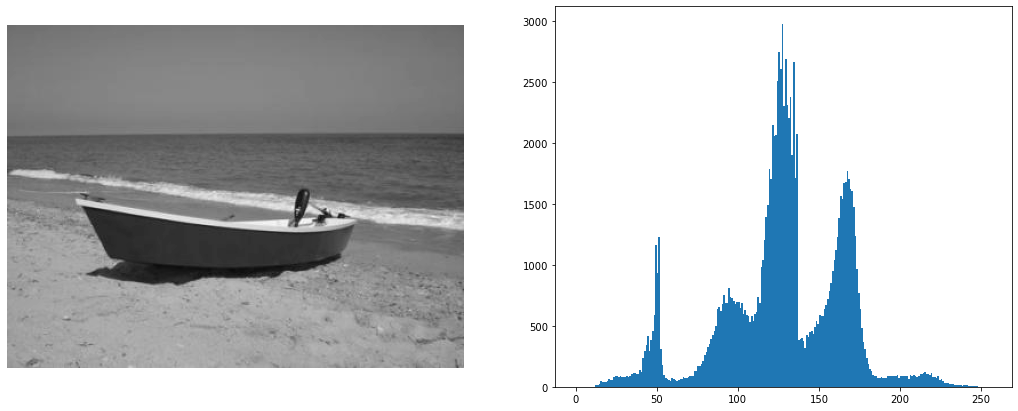

In [4]:
I = cv2.imread('im25.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (18,7))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

B = fig1.add_subplot(1, 2, 2)
plt.hist(I.ravel(),256,[0,256]); 
plt.show()

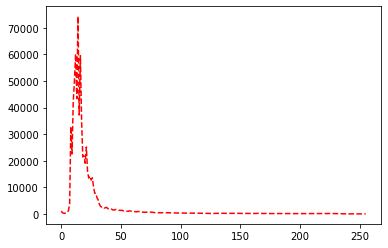

In [3]:
hist,bins = np.histogram(I.ravel(),256,[0,256])
plt.plot(bins[:-1],hist,'r--')

#hist = cv2.calcHist([I],[0],None,[256],[0,256])
#plt.plot(hist)
#plt.hist(I.ravel(),256,[0,256]); plt.show()

## Ecualización del histograma 
For discrete values, we work with probabilities and summations  The probability of occurrence of intensity level is approximated by $$p_r(r_k)=\frac{n_k}{MN}$$ where $MN$ is the total number of pixels in the image, and $n_k$ denotes the number of pixels that have intensity $r_k$. The discrete form of the transformation $$s_k=T(r_k)=(L-1)\sum_{j=0}^{k}p_r(r_j) \quad k=0,1,2, \ldots, L-1 $$

In [4]:
M,N=I.shape
pr=hist/(M*N)
L=256;
trk=np.floor((L-1)*np.cumsum(pr))
Im=trk[I[:,:]]
#plt.plot(suma)


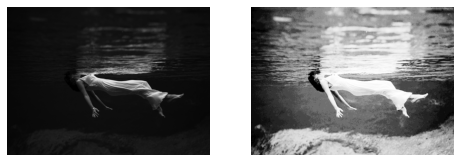

In [5]:
fig1=plt.figure(figsize = (8,8))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

b = fig1.add_subplot(1, 2, 2)
plt.imshow(Im, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

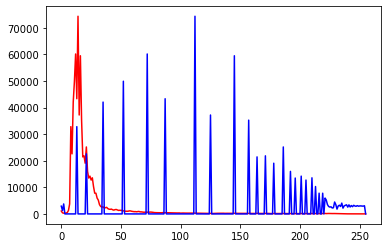

In [6]:
hist,bins = np.histogram(I.ravel(),256,[0,256])
plt.plot(bins[:-1],hist,'r')
hist,bins = np.histogram(Im.ravel(),256,[0,256])
plt.plot(bins[:-1],hist,'b')